# 데이터 분석
> 1. 각 컬럼별 관중 수 관계 파악하기
> 2. 상관계수 확인하기

In [1]:
# 계산
import pandas as pd
import numpy as np

# 차트
import seaborn as sns
import matplotlib.pyplot as plt

# 표준화
from sklearn.preprocessing import StandardScaler

In [2]:
# 차트 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글 폰트 문제 해결 함수
def fontKorea():
    # 한글 폰트 문제 해결 
    # matplotlib은 한글 폰트를 지원하지 않음
    # os정보
    import platform

    # font_manager : 폰트 관리 모듈
    # rc : 폰트 변경 모듈
    from matplotlib import font_manager, rc
    # unicode 설정
    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows':
        path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")

In [4]:
# 데이터 열기
kiwoom_new = pd.read_csv('../Data/kiwoom_new.csv')
kiwoom_new.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척


In [5]:
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          171 non-null    object 
 1   팀명          171 non-null    object 
 2   순위          171 non-null    int64  
 3   총 경기수       171 non-null    int64  
 4   승리          171 non-null    int64  
 5   패배          171 non-null    int64  
 6   무승부         171 non-null    int64  
 7   승률          171 non-null    float64
 8   게임차         171 non-null    float64
 9   최근 10경기 전적  171 non-null    object 
 10  연속 승패 현황    171 non-null    object 
 11  홈 경기 전적     171 non-null    object 
 12  원정 경기 전적    171 non-null    object 
 13  요일          171 non-null    object 
 14  홈팀          171 non-null    object 
 15  원정팀         171 non-null    object 
 16  장소          171 non-null    object 
 17  관중 수        171 non-null    int64  
 18  시작시간        171 non-null    object 
 19  종료시간        171 non-null    o

----
## 필요 데이터 선별
----

In [6]:
# 날짜 데이터 타입 변환
kiwoom_new['날짜'] = kiwoom_new['날짜'].astype('datetime64[ns]')
kiwoom_new

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,...,홈팀,원정팀,장소,관중 수,시작시간,종료시간,경기시간,홈팀 선발,어웨이팀 선발,구장
0,2022-04-02,키움,6,1,0,1,0,0.000,1.0,0승0무1패,...,키움,롯데,고척,8257,14:00,17:12,3:12,안우진,반즈,고척
1,2022-04-03,키움,4,2,1,1,0,0.500,1.0,1승0무1패,...,키움,롯데,고척,6115,14:00,17:55,3:55,요키시,박세웅,고척
2,2022-04-05,키움,6,3,1,2,0,0.333,2.0,1승0무2패,...,키움,LG,고척,2298,18:30,21:34,3:04,애플러,임찬규,고척
3,2022-04-06,키움,7,4,1,3,0,0.250,3.0,1승0무3패,...,키움,LG,고척,2304,18:30,22:13,3:43,최원태,손주영,고척
4,2022-04-07,키움,7,5,1,4,0,0.200,4.0,1승0무4패,...,키움,LG,고척,2055,18:30,21:01,2:31,정찬헌,김윤식,고척
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,키움,7,45,19,26,0,0.422,10.0,4승0무6패,...,키움,SSG,고척,10049,14:01,17:13,3:12,김인범,오원석,고척
167,2024-05-21,키움,8,46,19,27,0,0.413,10.0,4승0무6패,...,키움,NC,고척,3940,18:31,21:53,3:22,하영민,신민혁,고척
168,2024-05-22,키움,8,47,19,28,0,0.404,10.0,4승0무6패,...,키움,NC,고척,4337,18:31,21:54,3:23,후라도,하트,고척
169,2024-05-23,키움,8,48,20,28,0,0.417,9.0,5승0무5패,...,키움,NC,고척,3897,18:30,21:14,2:44,헤이수스,김시훈,고척


In [7]:
# 정보 확인
kiwoom_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          171 non-null    datetime64[ns]
 1   팀명          171 non-null    object        
 2   순위          171 non-null    int64         
 3   총 경기수       171 non-null    int64         
 4   승리          171 non-null    int64         
 5   패배          171 non-null    int64         
 6   무승부         171 non-null    int64         
 7   승률          171 non-null    float64       
 8   게임차         171 non-null    float64       
 9   최근 10경기 전적  171 non-null    object        
 10  연속 승패 현황    171 non-null    object        
 11  홈 경기 전적     171 non-null    object        
 12  원정 경기 전적    171 non-null    object        
 13  요일          171 non-null    object        
 14  홈팀          171 non-null    object        
 15  원정팀         171 non-null    object        
 16  장소          171 non-null  

In [8]:
# 해당 열들은 하는 분석 내용과 상관이 없는 데이터 -> 삭제
kiwoom_new = kiwoom_new.drop(['팀명','홈팀','장소','구장','홈팀 선발','어웨이팀 선발'],axis=1)
kiwoom_new

,날짜,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적,요일,원정팀,관중 수,시작시간,종료시간,경기시간
0,2022-04-02,6,1,0,1,0,0.000,1.0,0승0무1패,1패,0-0-1,0-0-0,토,롯데,8257,14:00,17:12,3:12
1,2022-04-03,4,2,1,1,0,0.500,1.0,1승0무1패,1승,1-0-1,0-0-0,일,롯데,6115,14:00,17:55,3:55
2,2022-04-05,6,3,1,2,0,0.333,2.0,1승0무2패,1패,1-0-2,0-0-0,화,LG,2298,18:30,21:34,3:04
3,2022-04-06,7,4,1,3,0,0.250,3.0,1승0무3패,2패,1-0-3,0-0-0,수,LG,2304,18:30,22:13,3:43
4,2022-04-07,7,5,1,4,0,0.200,4.0,1승0무4패,3패,1-0-4,0-0-0,목,LG,2055,18:30,21:01,2:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2024-05-19,7,45,19,26,0,0.422,10.0,4승0무6패,1승,10-0-14,9-0-12,일,SSG,10049,14:01,17:13,3:12
167,2024-05-21,8,46,19,27,0,0.413,10.0,4승0무6패,1패,10-0-15,9-0-12,화,NC,3940,18:31,21:53,3:22
168,2024-05-22,8,47,19,28,0,0.404,10.0,4승0무6패,2패,10-0-16,9-0-12,수,NC,4337,18:31,21:54,3:23
169,2024-05-23,8,48,20,28,0,0.417,9.0,5승0무5패,1승,11-0-16,9-0-12,목,NC,3897,18:30,21:14,2:44


In [9]:
kiwoom_new = kiwoom_new[['날짜','순위','요일','원정팀','관중 수','시작시간']]
kiwoom_new

,날짜,순위,요일,원정팀,관중 수,시작시간
0,2022-04-02,6,토,롯데,8257,14:00
1,2022-04-03,4,일,롯데,6115,14:00
2,2022-04-05,6,화,LG,2298,18:30
3,2022-04-06,7,수,LG,2304,18:30
4,2022-04-07,7,목,LG,2055,18:30
...,...,...,...,...,...,...
166,2024-05-19,7,일,SSG,10049,14:01
167,2024-05-21,8,화,NC,3940,18:31
168,2024-05-22,8,수,NC,4337,18:31
169,2024-05-23,8,목,NC,3897,18:30


In [10]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '18:29', '17:00', '17:01', '13:59', '18:33',
       '14:01', '18:31', '18:00', '18:01'], dtype=object)

In [11]:
target_rows_18_30 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '18:29') |
        (kiwoom_new['시작시간'] == '18:33') |
        (kiwoom_new['시작시간'] == '18:31') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_18_30.index, '시작시간'] = '18:30'

In [12]:
target_rows_14_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '13:59') |
        (kiwoom_new['시작시간'] == '14:01')
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_14_00.index, '시작시간'] = '14:00'

In [13]:
target_rows_17_00 = \
    kiwoom_new[
        (kiwoom_new['시작시간'] == '17:01') |
        (kiwoom_new['시작시간'] == '18:00') |
        (kiwoom_new['시작시간'] == '18:01') 
        ]

# 시작시간 변경
kiwoom_new.loc[target_rows_17_00.index, '시작시간'] = '17:00'

In [14]:
kiwoom_new['시작시간'].unique()

array(['14:00', '18:30', '17:00'], dtype=object)

----
## 2022~2023년 데이터와 2024년 데이터 분리
----

In [15]:
# 2022 ~ 2023년도 데이터
kiwoom_2022_2023 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2022) | 
        (kiwoom_new.날짜.dt.year == 2023)
        ]
kiwoom_2022_2023

,날짜,순위,요일,원정팀,관중 수,시작시간
0,2022-04-02,6,토,롯데,8257,14:00
1,2022-04-03,4,일,롯데,6115,14:00
2,2022-04-05,6,화,LG,2298,18:30
3,2022-04-06,7,수,LG,2304,18:30
4,2022-04-07,7,목,LG,2055,18:30
...,...,...,...,...,...,...
138,2023-09-21,10,목,NC,5178,18:30
139,2023-09-28,10,목,SSG,7082,17:00
140,2023-09-29,10,금,KIA,14472,14:00
141,2023-10-07,10,토,LG,13301,17:00


In [16]:
# 2024년도 데이터
kiwoom_2024 = \
    kiwoom_new[
        (kiwoom_new.날짜.dt.year == 2024)
        ].reset_index(drop=True)
kiwoom_2024

,날짜,순위,요일,원정팀,관중 수,시작시간
0,2024-03-29,10,금,LG,8465,18:30
1,2024-03-30,8,토,LG,13462,17:00
2,2024-03-31,7,일,LG,11822,14:00
3,2024-04-05,5,금,한화,16000,18:30
4,2024-04-06,5,토,한화,16000,17:00
5,2024-04-07,3,일,한화,16000,14:00
6,2024-04-12,3,금,롯데,8838,18:30
7,2024-04-13,3,토,롯데,14197,17:00
8,2024-04-14,3,일,롯데,12333,14:00
9,2024-04-16,2,화,KT,2877,18:30


----
## 컬럼별 타겟 분석 시작
----

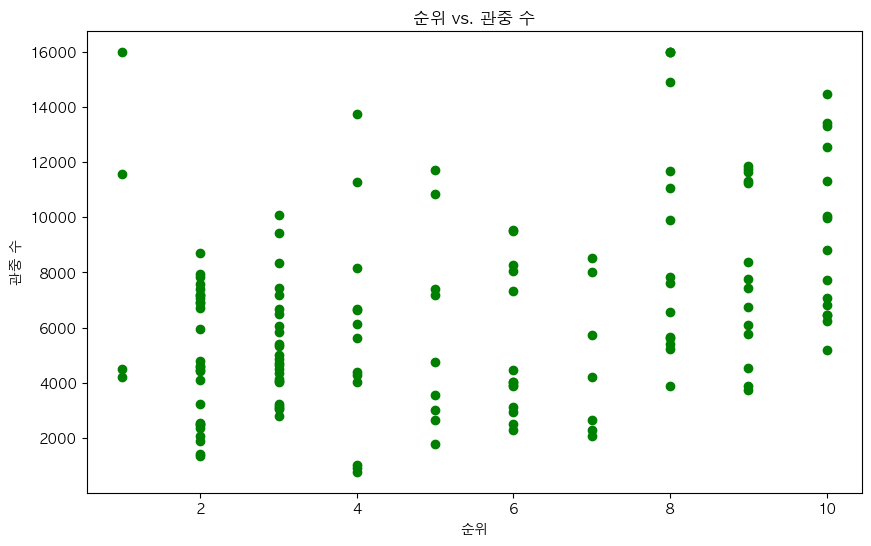

In [17]:
fontKorea()

# 당일 순위와 관중 수의 시각화
plt.figure(figsize=(10, 6))
plt.scatter(kiwoom_2022_2023['순위'], kiwoom_2022_2023['관중 수'], color='green')
plt.title('순위 vs. 관중 수')
plt.xlabel('순위')
plt.ylabel('관중 수')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 데이터 나누기
x = kiwoom_2022_2023['순위']
y = kiwoom_2022_2023['관중 수']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


훈련 세트 MSE: 10503702.130341632
훈련 세트 R^2: 14.211289418008866


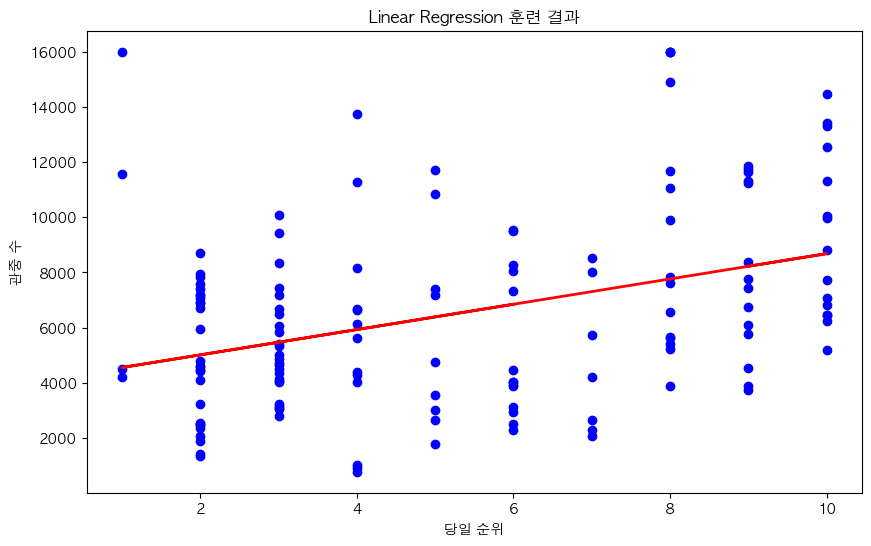

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression 모델 초기화
model = LinearRegression()

# X 데이터를 2차원 배열로 변환
X = x.values.reshape(-1, 1)

# 모델 훈련
model.fit(X, y)

# 훈련 세트 예측
predictions_train = model.predict(X)

# 훈련 세트에 대한 평가
mse_train = mean_squared_error(y, predictions_train)
r2_train = r2_score(y, predictions_train)

print("훈련 세트 MSE:", mse_train)
print("훈련 세트 R^2:", r2_train*100)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, predictions_train, color='red', linewidth=2)
plt.title('Linear Regression 훈련 결과')
plt.xlabel('당일 순위')
plt.ylabel('관중 수')
plt.show()

In [ ]:
# 순위 데이터만 가져오기
rank_crowd = kiwoom_2022_2023[['순위','관중 수']]
rank_crowd

In [ ]:
# 관중 수 분포 확인
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x=rank_crowd.iloc[:,0], y=rank_crowd.iloc[:,1], data=rank_crowd)
plt.title(f'{rank_crowd.columns[0]}별 {rank_crowd.columns[1]} 분포')
plt.show()

In [ ]:
kiwoom_2022_2023['순위표준화'] = kiwoom_2022_2023['순위'] * 0.1
kiwoom_2022_2023

In [ ]:
kiwoom_2022_2023[['순위표준화','관중 수']].corr()

In [ ]:
rank_crowd['순위'].value_counts()

In [ ]:
rank_crowd['관중 수']

In [ ]:
# 관중 수 분포 확인
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.barplot(
    x=kiwoom_2022_2023['순위'].value_counts().index,
    y=kiwoom_2022_2023['순위'].value_counts().values
    )
plt.scatter(
    x=kiwoom_2022_2023['순위'],
    y=kiwoom_2022_2023['관중 수']
)
plt.title('순위 분포도')
plt.ylabel('분포')
plt.show()

In [ ]:
# 데이터 준비
data_series = rank_crowd['순위'].value_counts()

# 데이터 최소값 및 최대값 계산
min_value = data_series.min()
max_value = data_series.max()

# 0~1 사이 표준화
normalized_data = (data_series - min_value) / (max_value - min_value)

# 결과 출력
print(normalized_data)

In [ ]:
normalized_data.index[9]

In [ ]:
normalized_data.values[0]

In [ ]:
# 변환
rank_mapping = {
    normalized_data.index[0] : normalized_data.values[0],
    normalized_data.index[1] : normalized_data.values[1],
    normalized_data.index[2] : normalized_data.values[2],
    normalized_data.index[3] : normalized_data.values[3],
    normalized_data.index[4] : normalized_data.values[4],
    normalized_data.index[5] : normalized_data.values[5],
    normalized_data.index[6] : normalized_data.values[6],
    normalized_data.index[7] : normalized_data.values[7],
    normalized_data.index[8] : normalized_data.values[8],
    normalized_data.index[9] : normalized_data.values[9]
}
rank_mapping

In [ ]:
kiwoom_2022_2023['순위분포표준화'] = kiwoom_2022_2023['순위'].map(rank_mapping)
kiwoom_2022_2023.head()

In [ ]:
kiwoom_2022_2023[['관중 수','순위분포표준화','순위']].corr()

In [ ]:
kiwoom_2022_2023['원정팀'].unique()

In [ ]:
# 관중 수 분포 확인
fontKorea()

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.barplot(
    x=kiwoom_2022_2023['순위'].value_counts().index,
    y=kiwoom_2022_2023['순위'].value_counts().values
    )
plt.scatter(
    x=kiwoom_2022_2023['순위'],
    y=kiwoom_2022_2023['관중 수']
)
plt.title('순위 분포도')
plt.ylabel('분포')
plt.show()

In [ ]:
# 분류, 예측 함수들
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 예측 모델(분류)
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 예측 모델(회귀)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 보팅
from sklearn.ensemble import VotingClassifier

In [ ]:
# 데이터 준비 (x는 피쳐, y는 타겟)
x = kiwoom_2022_2023[['순위']]
y = kiwoom_2022_2023[['관중 수']]

# 실제 데이터 준비
test_x = kiwoom_2024[['순위']]
test_y = kiwoom_2024[['관중 수']]

In [ ]:
train_input, test_input, train_target, test_target = \
    train_test_split(x, y, random_state=42)

In [ ]:
# 교차 검증, bagging(단일 모델 조합) 예측을 실행하는 모델 함수(랜덤포레스트, 의사결정 나무에만 사용할 것)
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(
            classifier, # 함수
            features,
            labels,
            cv=10,
            scoring='accuracy',
            n_jobs=-1
        )
        cv_scores.append(scores.mean()*100)
    return cv_scores

In [ ]:
cross_validation(tree.DecisionTreeClassifier(), x, y)

In [ ]:
cross_validation(RandomForestClassifier()(), x, y)

In [ ]:
# 단일 모델 예측력
# 의사결정 나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(train_input, train_target)
print(f"dTree : {dtree.score(test_input, test_target)}")

# KNN
knn = KNeighborsClassifier().fit(train_input, train_target)
print(f"kNN : {knn.score(test_input, test_target)}")

# SVM
svm = SVC(probability=True).fit(train_input, train_target)
print(f"svm : {svm.score(test_input, test_target)}")

In [ ]:
# 하드보팅(Voting)앙상블
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='hard'
).fit(train_input, train_target)

voting_clf.score(test_input, test_target)

In [ ]:
# 하드보팅(Voting)앙상블
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree),
        ('knn', knn),
        ('svm', svm),
    ],
    weights=[1,1,1],
    voting='hard'
).fit(train_input, train_target)

voting_clf.score(test_input, test_target)

In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)

In [ ]:
# 과대적합과 과소적합
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))